<a href="https://colab.research.google.com/github/alxmzr/Colab/blob/main/Chandelier_Exit_BackTrader_Bot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
if True:
    !pip install backtrader[plotting]
    # !pip list
    !curl -O https://raw.githubusercontent.com/mementum/backtrader/master/datas/orcl-1995-2014.txt

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 16,9
rcParams['figure.facecolor'] = '#eeeeee'
plt.title('dummy')
plt.plot([1,3,2,4])
plt.close()

Starting Portfolio Value: 1000.00
Final Portfolio Value: 1000.00


<IPython.core.display.Javascript object>

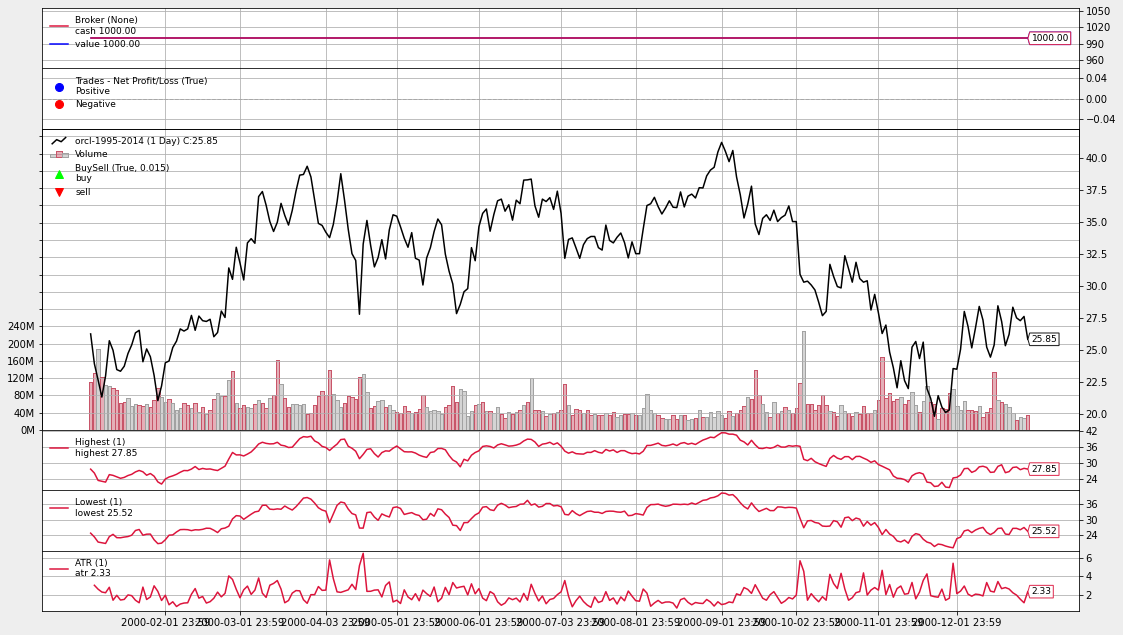

In [ ]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])

# Import the backtrader platform
import backtrader as bt

# Create a Stratey
class ChandelierExit(bt.Strategy):
    params = (('period', 1), ('multip', 2),)

    def log(self, txt, dt=None):
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        highest = bt.ind.Highest(self.data.high, period=self.p.period)
        lowest = bt.ind.Lowest(self.data.low, period=self.p.period)
        atr = self.p.multip * bt.ind.ATR(self.data, period=self.p.period)
        self.lines.long = highest - atr
        self.lines.short = lowest + atr

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            return

        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        # Write down: no pending order
        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))

    def next(self):
      if self.lines.long > self.data.close:
          # Do something
          pass

      elif self.lines.short < self.data.close:
          # Do something else
          pass

# class TestStrategy(bt.Strategy):
#     params = (
#         ('maperiod', 15),
#     )

#     def log(self, txt, dt=None):
#         ''' Logging function fot this strategy'''
#         dt = dt or self.datas[0].datetime.date(0)
#         print('%s, %s' % (dt.isoformat(), txt))

#     def __init__(self):
#         # Keep a reference to the "close" line in the data[0] dataseries
#         self.dataclose = self.datas[0].close

        # # To keep track of pending orders and buy price/commission
        # self.order = None
        # self.buyprice = None
        # self.buycomm = None

        # # Add a MovingAverageSimple indicator
        # self.sma = bt.indicators.SimpleMovingAverage(
        #     self.datas[0], period=self.params.maperiod)

#         # Indicators for the plotting show
#         bt.indicators.ExponentialMovingAverage(self.datas[0], period=25)
#         bt.indicators.WeightedMovingAverage(self.datas[0], period=25,
#                                             subplot=True)
        # bt.indicators.StochasticSlow(self.datas[0])
        # bt.indicators.MACDHisto(self.datas[0])
        # rsi = bt.indicators.RSI(self.datas[0])
        # bt.indicators.SmoothedMovingAverage(rsi, period=10)
        # bt.indicators.ATR(self.datas[0], plot=False)

    # def notify_order(self, order):
    #     if order.status in [order.Submitted, order.Accepted]:
    #         # Buy/Sell order submitted/accepted to/by broker - Nothing to do
    #         return

    #     # Check if an order has been completed
    #     # Attention: broker could reject order if not enough cash
    #     if order.status in [order.Completed]:
    #         if order.isbuy():
    #             self.log(
    #                 'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
    #                 (order.executed.price,
    #                  order.executed.value,
    #                  order.executed.comm))

    #             self.buyprice = order.executed.price
    #             self.buycomm = order.executed.comm
    #         else:  # Sell
    #             self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
    #                      (order.executed.price,
    #                       order.executed.value,
    #                       order.executed.comm))

    #         self.bar_executed = len(self)

    #     elif order.status in [order.Canceled, order.Margin, order.Rejected]:
    #         self.log('Order Canceled/Margin/Rejected')

    #     # Write down: no pending order
    #     self.order = None

    # def notify_trade(self, trade):
    #     if not trade.isclosed:
    #         return

    #     self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
    #              (trade.pnl, trade.pnlcomm))

    # def next(self):
    #     # Simply log the closing price of the series from the reference
    #     self.log('Close, %.2f' % self.dataclose[0])

        # # Check if an order is pending ... if yes, we cannot send a 2nd one
        # if self.order:
        #     return

        # # Check if we are in the market
        # if not self.position:

        #     # Not yet ... we MIGHT BUY if ...
        #     if self.dataclose[0] > self.sma[0]:

        #         # BUY, BUY, BUY!!! (with all possible default parameters)
        #         self.log('BUY CREATE, %.2f' % self.dataclose[0])

        #         # Keep track of the created order to avoid a 2nd order
        #         self.order = self.buy()

        # else:

        #     if self.dataclose[0] < self.sma[0]:
        #         # SELL, SELL, SELL!!! (with all possible default parameters)
        #         self.log('SELL CREATE, %.2f' % self.dataclose[0])

        #         # Keep track of the created order to avoid a 2nd order
        #         self.order = self.sell()

if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add a strategy
    cerebro.addstrategy(ChandelierExit)

    # Datas are in a subfolder of the samples. Need to find where the script is
    # because it could have been called from anywhere
    modpath = os.path.dirname(os.path.abspath(sys.argv[0]))
    datapath = './orcl-1995-2014.txt' #os.path.join(modpath, '../../datas/orcl-1995-2014.txt')

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname=datapath,
        # Do not pass values before this date
        fromdate=datetime.datetime(2000, 1, 1),
        # Do not pass values before this date
        todate=datetime.datetime(2000, 12, 31),
        # Do not pass values after this date
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(1000.0)

    # Add a FixedSize sizer according to the stake
    cerebro.addsizer(bt.sizers.FixedSize, stake=10)

    # Set the commission
    cerebro.broker.setcommission(commission=0.0)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Plot the result
    cerebro.plot()
